In [10]:
import sys 
import os
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
sys.path.insert(0, '../../Telcom-Customer-Churn-Prediction')
from src.utility import get_spark
from src.config import TRAINING_FILE,MODELS
from IPython.display import  display,HTML
from pyspark.ml import Pipeline
from pyspark.ml.feature import  StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
file_type = 'csv'
# The applied options are for CSV files. For other file types, these will be ignored.
df = get_spark().read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(TRAINING_FILE)

display(df.toPandas())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
display(df.summary().show())

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|  count|      7043|  7043|              7043|   7043|      7043|     

None

<Axes: xlabel='gender', ylabel='count'>

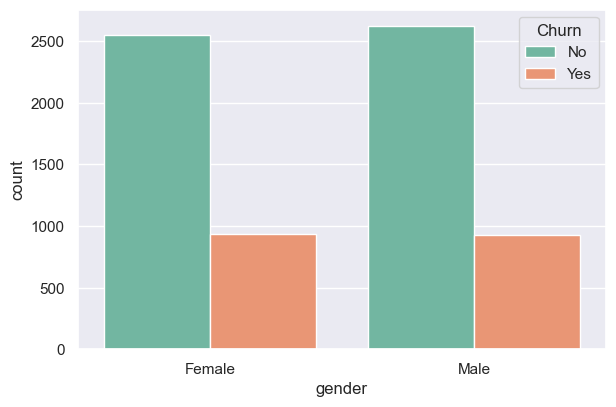

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.countplot(x = 'gender', hue = 'Churn', palette = 'Set2', data = df.toPandas())

<Axes: xlabel='PaperlessBilling', ylabel='count'>

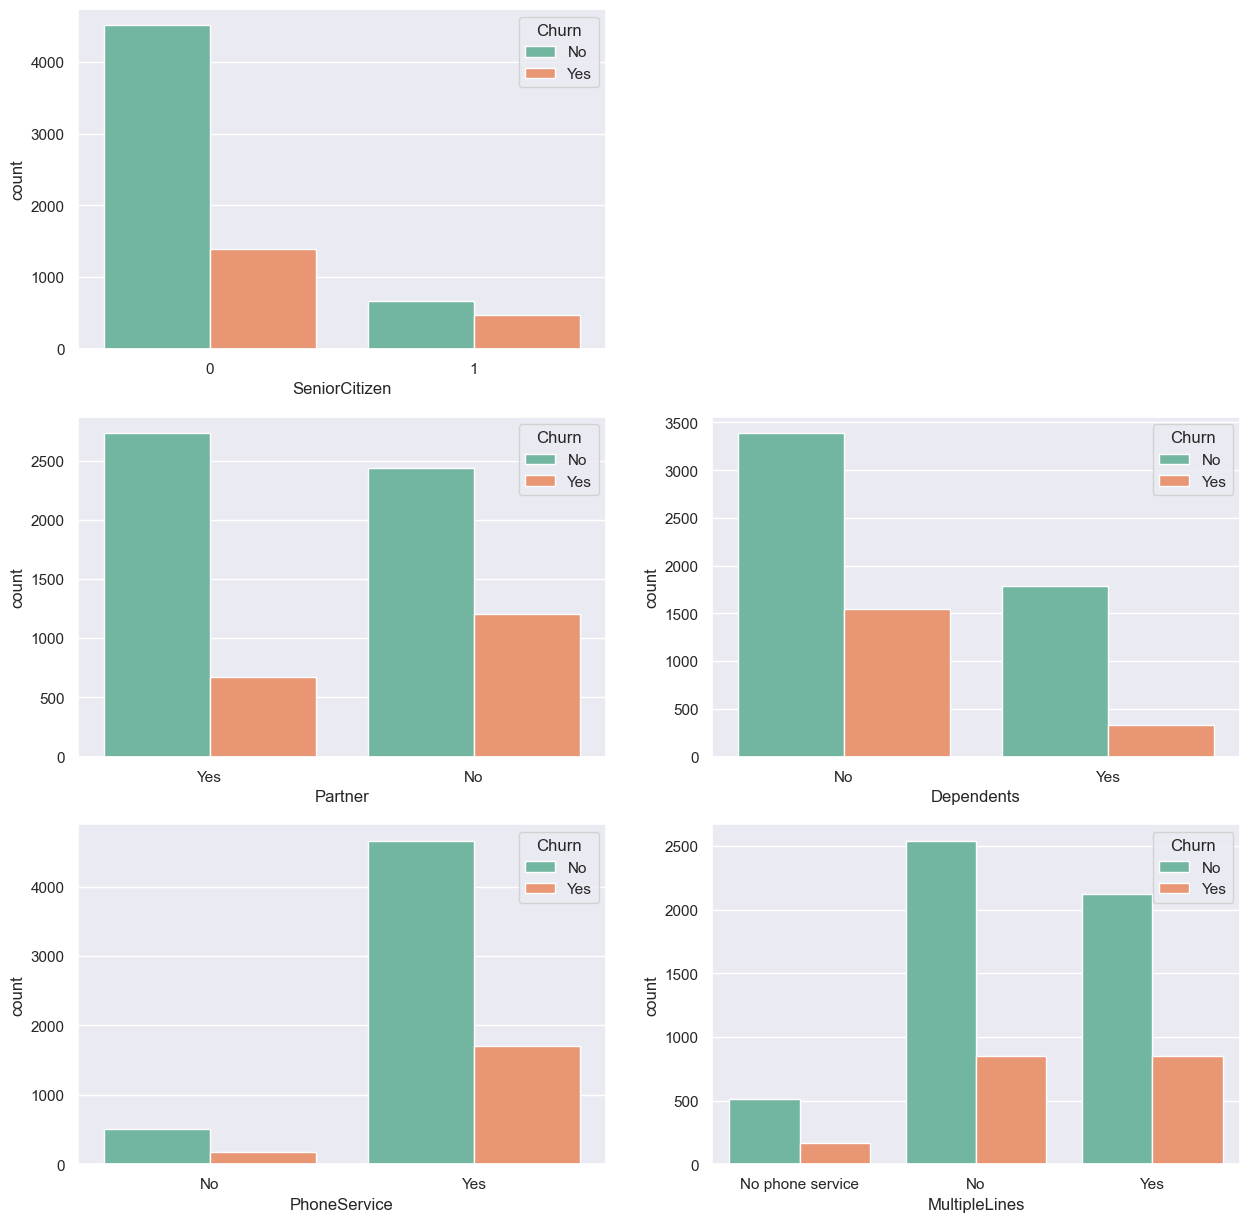

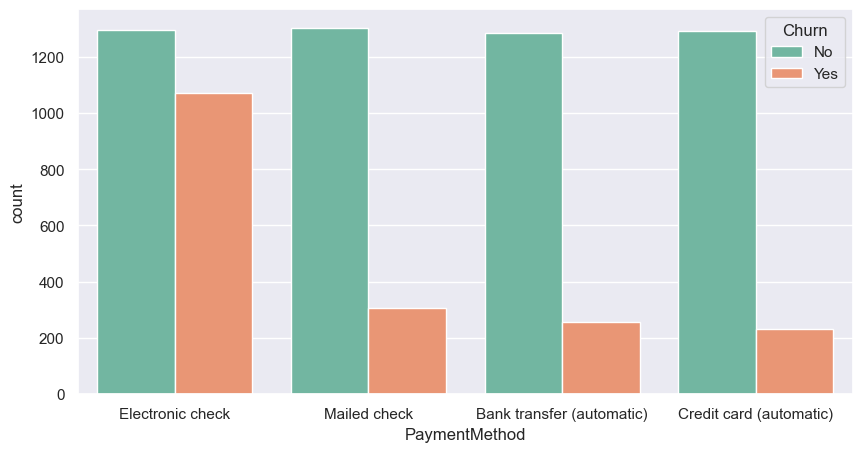

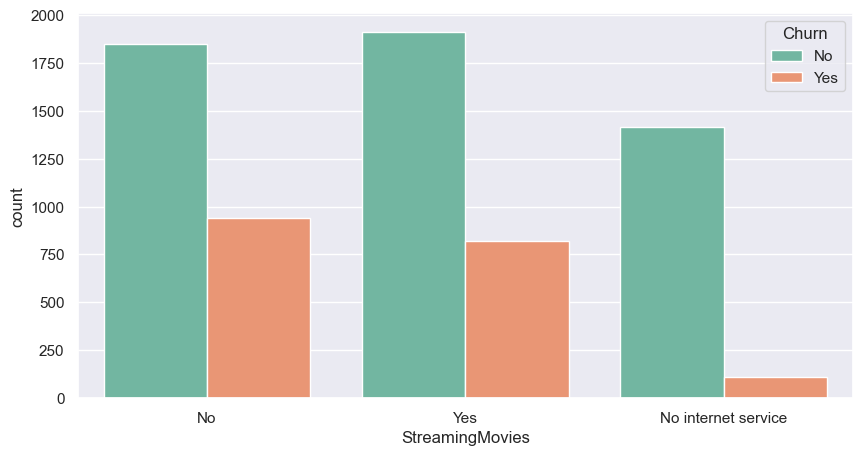

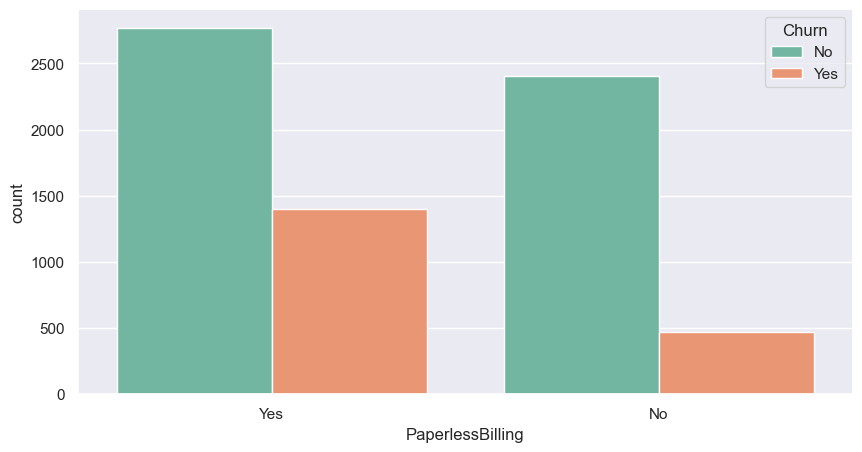

In [14]:
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', palette = 'Set2', data = df.toPandas())

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', hue = 'Churn', palette = 'Set2', data = df.toPandas())

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', hue = 'Churn', palette = 'Set2', data = df.toPandas())

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', hue = 'Churn', palette = 'Set2', data = df.toPandas())

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', hue = 'Churn', palette = 'Set2', data = df.toPandas())

plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', palette = 'Set2', data = df.toPandas())

plt.figure(figsize = (10,5))
sns.countplot(x = 'StreamingMovies', hue = 'Churn', palette = 'Set2', data = df.toPandas())

plt.figure(figsize = (10,5))
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', palette = 'Set2', data = df.toPandas())

<Axes: xlabel='MonthlyCharges'>

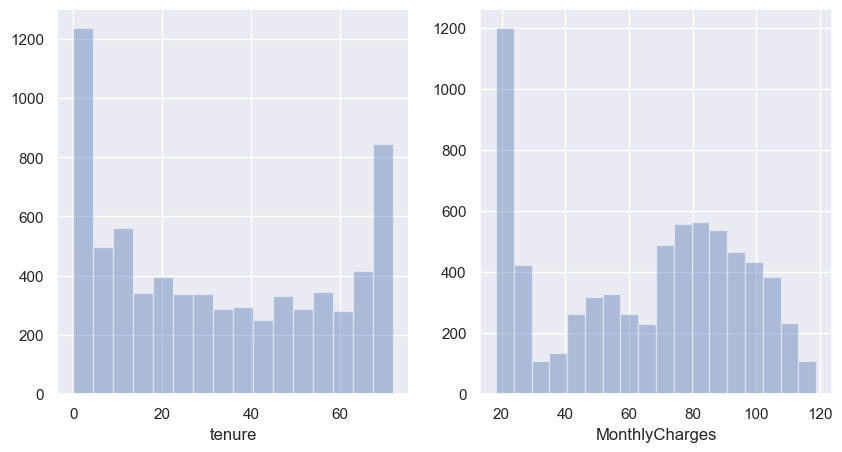

In [15]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)

sns.distplot(df.toPandas()['tenure'], kde = False)

plt.subplot(1,2,2)
sns.distplot(df.toPandas()['MonthlyCharges'], kde = False)

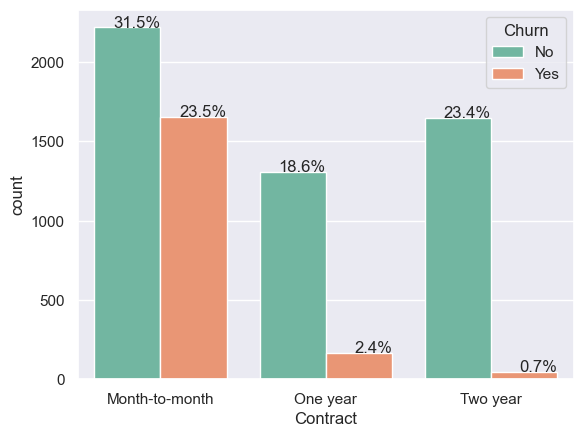

In [16]:
data = df.toPandas()
ax=sns.countplot(x = 'Contract', hue = 'Churn', palette = 'Set2', data = df.toPandas())
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

In [17]:
df.toPandas().to_csv("../data/trainingData.csv")

In [18]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)

